# Bibliotecas usadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from xgboost import XGBRegressor

# Análise exploratória

In [2]:
file_path = './ailerons.csv'  
data = pd.read_csv(file_path)

In [3]:
print(data.head())

print(data.describe())


   ClimbRate  Sgz     P     Q  CurPitch  CurRoll  AbsRoll  DiffClb  \
0        -17   -6 -0.03  0.14      0.59     -0.5      -11       -9   
1       -791   15 -0.28 -0.34      1.11      0.9      -10       27   
2        -46   48 -0.42  0.07      0.57      0.6       -5       -8   
3        496   -5 -0.21 -0.04      0.03     -0.5       -7        6   
4       -124   16 -0.02  0.05      0.61     -0.2       -9       -3   

   DiffRollRate  DiffDiffClb  ...  DiffSeTime8  DiffSeTime9  DiffSeTime10  \
0         0.015         -0.2  ...          0.0          0.0           0.0   
1        -0.002          4.7  ...          0.0          0.0           0.0   
2        -0.008          0.0  ...          0.0          0.0           0.0   
3        -0.002         -0.1  ...          0.0          0.0           0.0   
4         0.000          0.0  ...          0.0          0.0           0.0   

   DiffSeTime11  DiffSeTime12  DiffSeTime13  DiffSeTime14  Alpha     Se  \
0         0.000           0.0         0.0

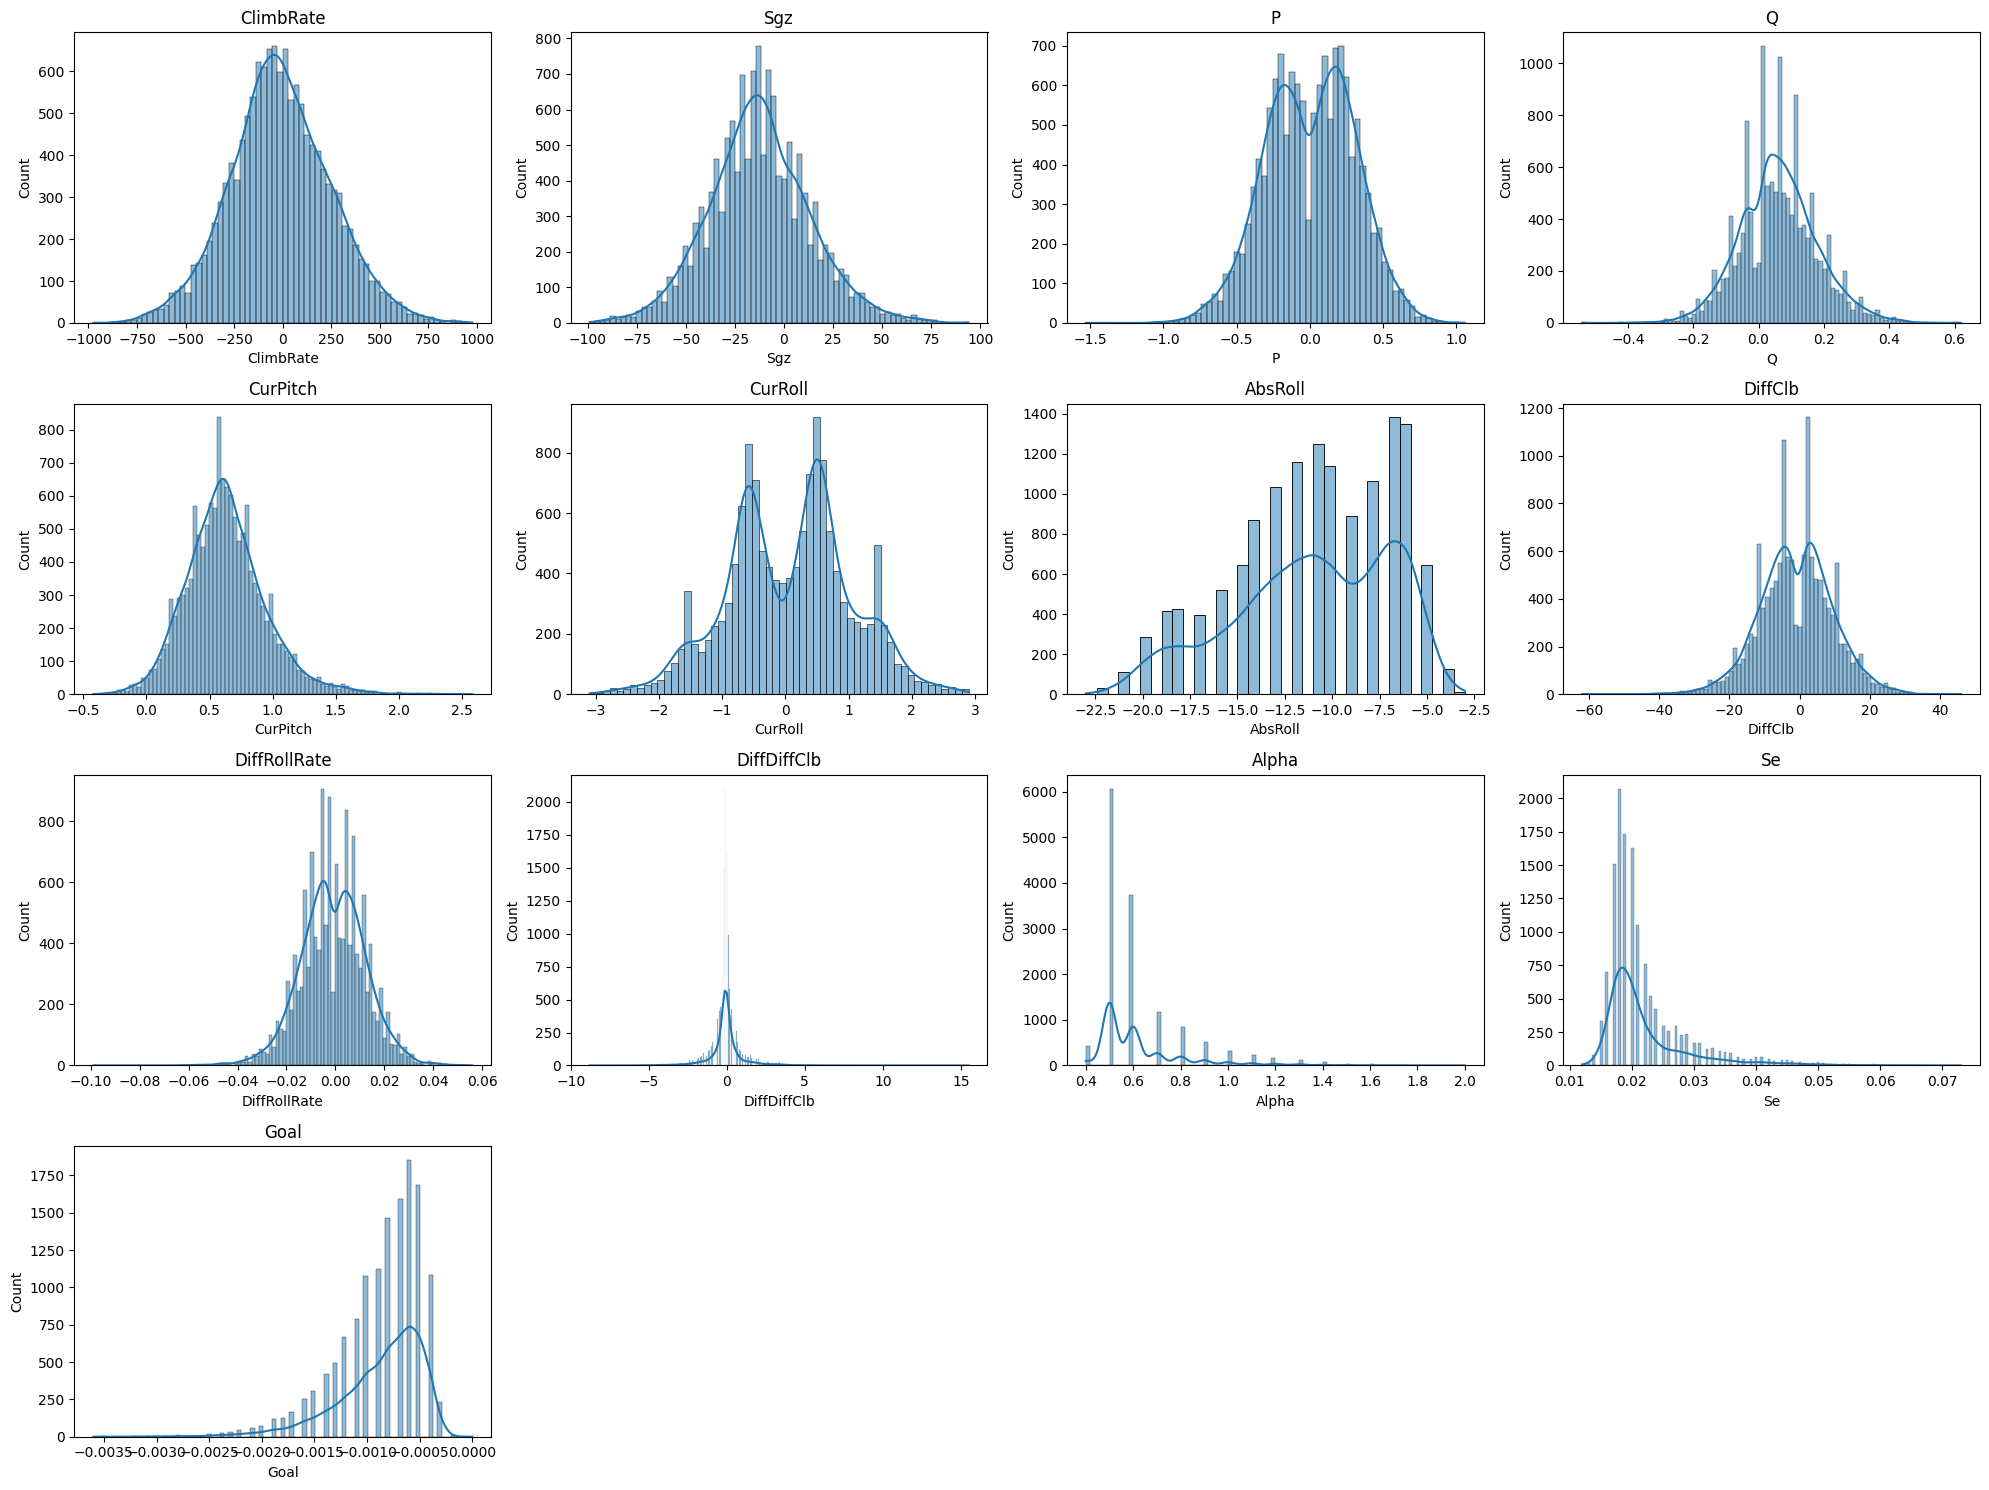

In [4]:
plt.figure(figsize=(20, 15))

columns_to_plot = ['ClimbRate', 'Sgz', 'P', 'Q', 'CurPitch', 'CurRoll', 'AbsRoll', 'DiffClb', 'DiffRollRate', 'DiffDiffClb', 'Alpha', 'Se', 'Goal']

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


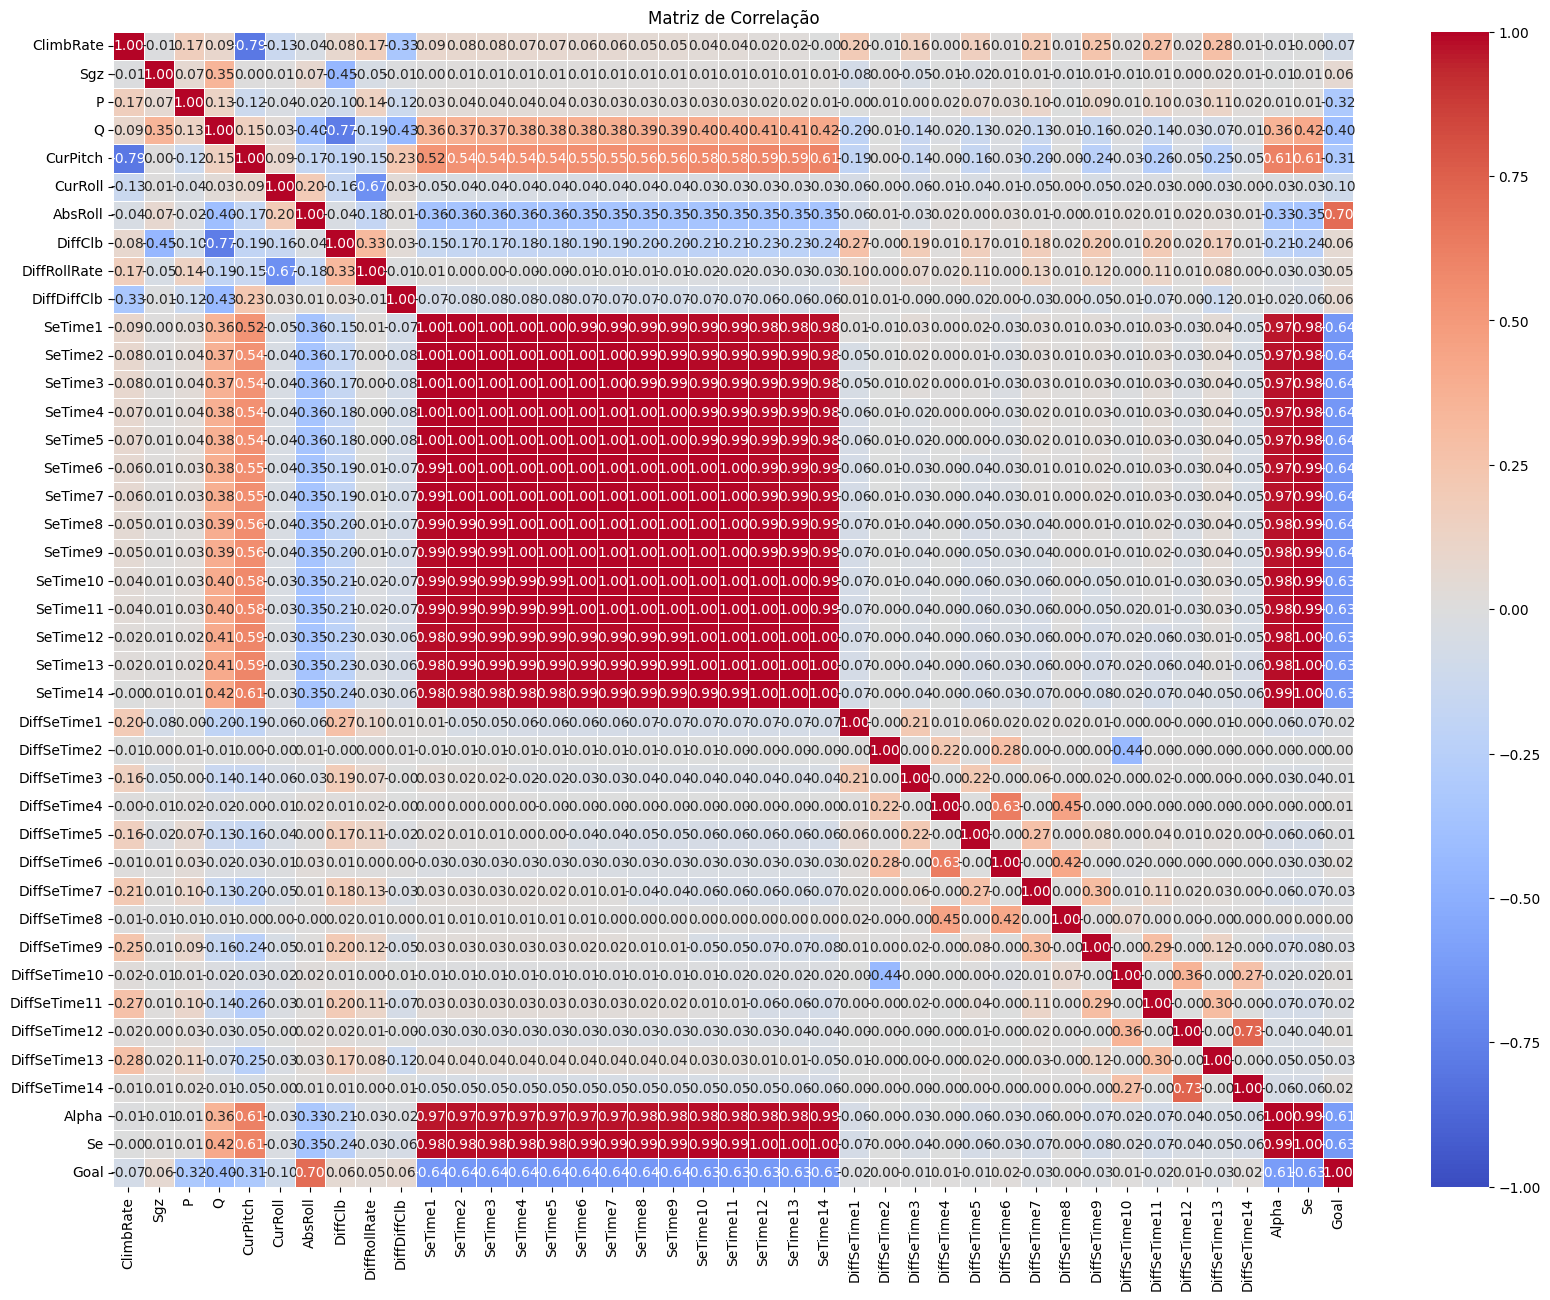

In [5]:
def plot_corr_matrix(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(20, 15))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Matriz de Correlação')
    plt.show()
plot_corr_matrix(data)

# Questões

### I

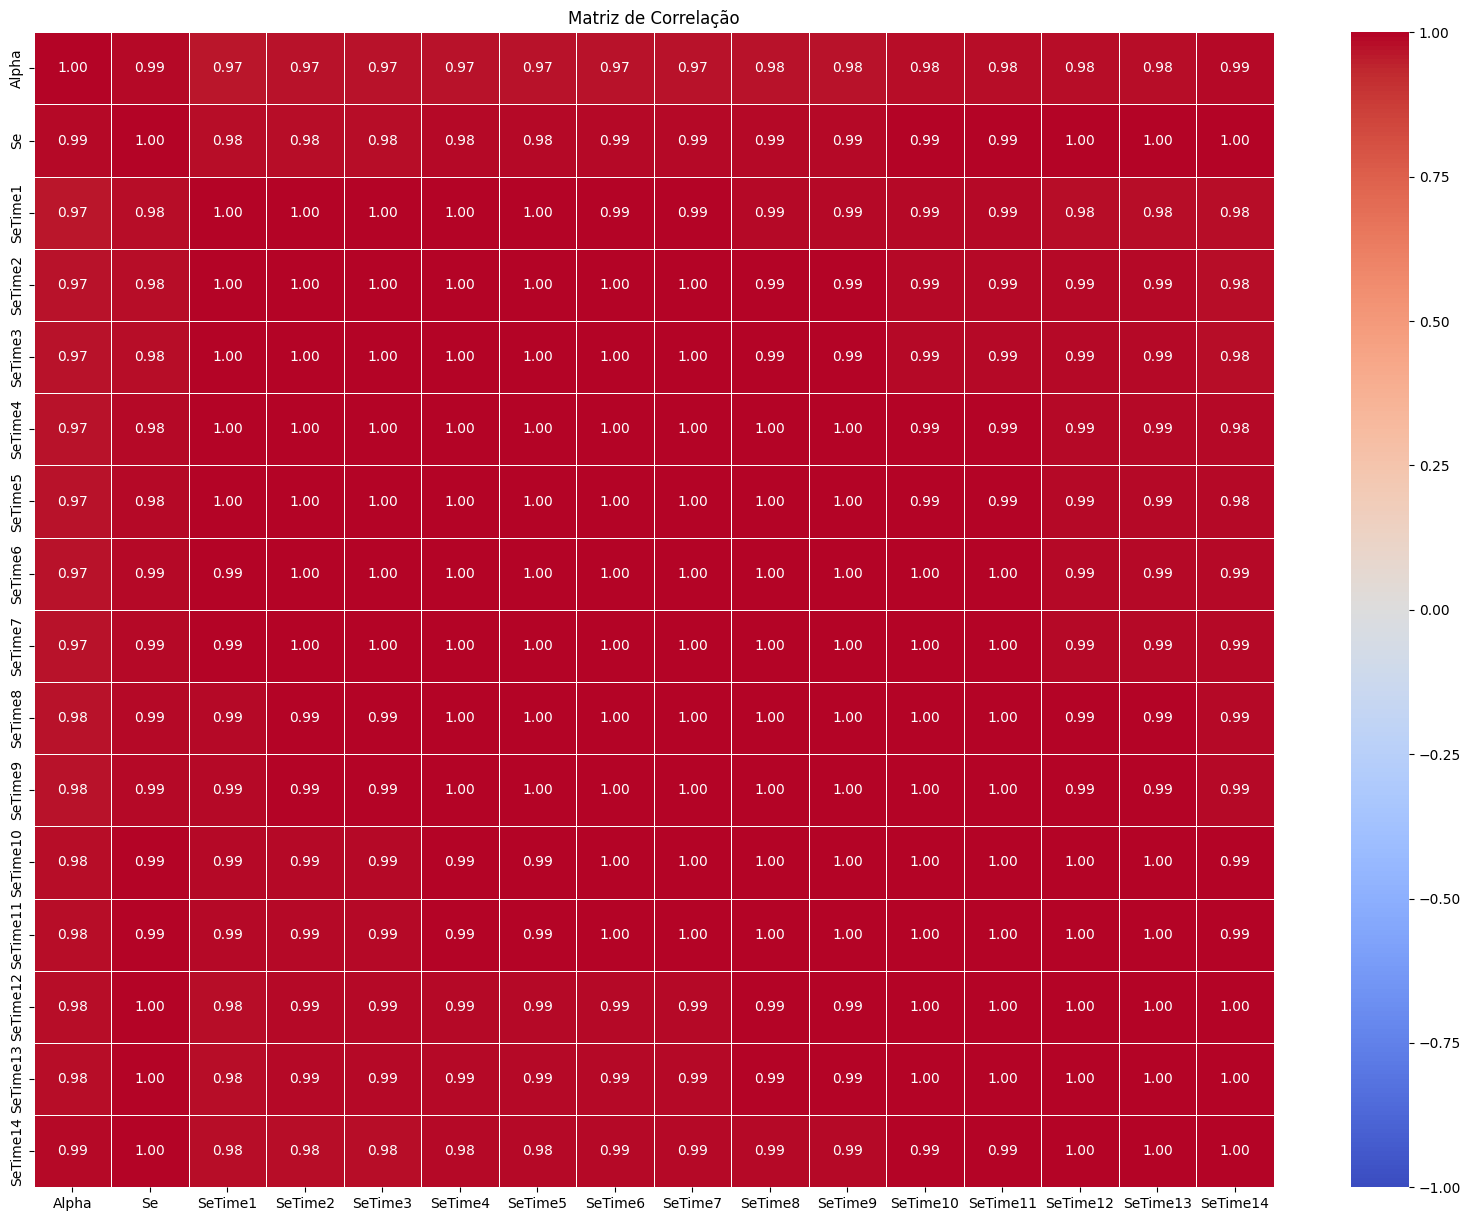

In [6]:
plot_corr_matrix(data[['Alpha', 'Se'] + [f'SeTime{i}' for i in range(1, 15)]])

### II

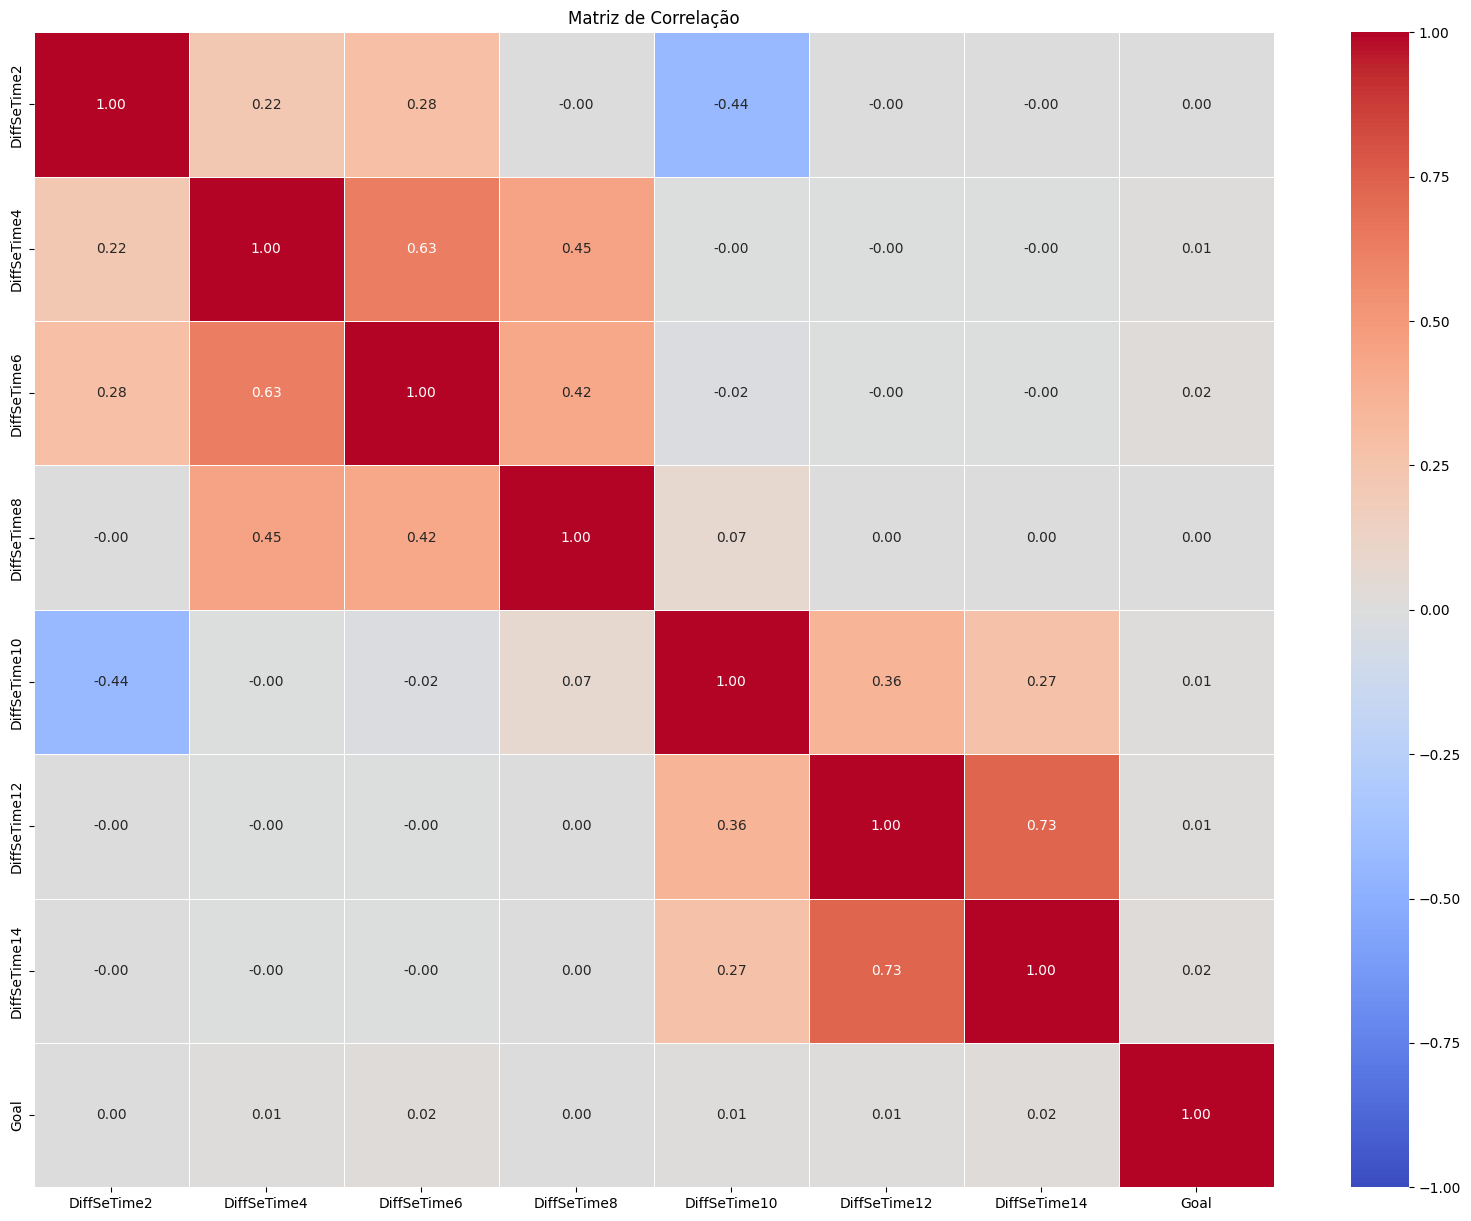

In [7]:
plot_corr_matrix(data[[f'DiffSeTime{2*i}' for i in range(1, 8)] + ['Goal']] )

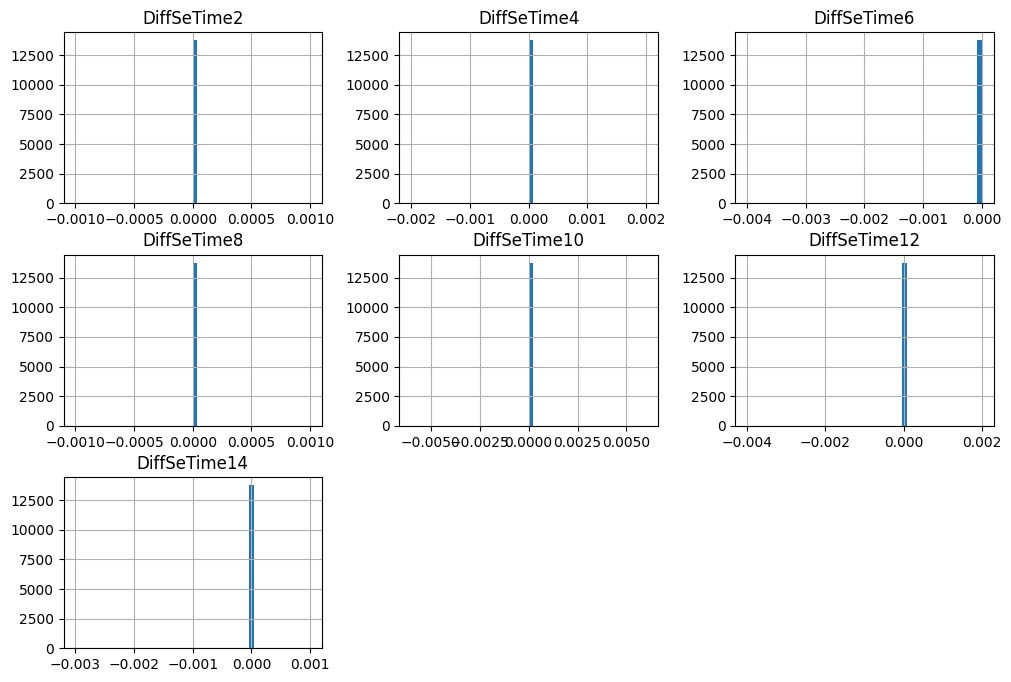

        DiffSeTime2   DiffSeTime4   DiffSeTime6   DiffSeTime8  DiffSeTime10  \
count  13750.000000  1.375000e+04  1.375000e+04  13750.000000  1.375000e+04   
mean       0.000000 -1.454545e-07 -6.545455e-07      0.000000 -5.090909e-07   
std        0.000012  2.696858e-05  4.263667e-05      0.000012  8.312241e-05   
min       -0.001000 -2.000000e-03 -4.000000e-03     -0.001000 -6.000000e-03   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
50%        0.000000  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
75%        0.000000  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
max        0.001000  2.000000e-03  0.000000e+00      0.001000  6.000000e-03   

       DiffSeTime12  DiffSeTime14  
count  1.375000e+04  1.375000e+04  
mean  -9.454545e-07 -6.545455e-07  
std    6.089718e-05  4.263667e-05  
min   -4.000000e-03 -3.000000e-03  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  


In [8]:
data_subset = data[[f'DiffSeTime{2*i}' for i in range(1, 8)]]
data_subset.hist(bins=50, figsize=(12, 8))
plt.show()
print(data_subset.describe())

In [9]:
missing_values = data.isnull().sum()
print(missing_values)

ClimbRate       0
Sgz             0
P               0
Q               0
CurPitch        0
CurRoll         0
AbsRoll         0
DiffClb         0
DiffRollRate    0
DiffDiffClb     0
SeTime1         0
SeTime2         0
SeTime3         0
SeTime4         0
SeTime5         0
SeTime6         0
SeTime7         0
SeTime8         0
SeTime9         0
SeTime10        0
SeTime11        0
SeTime12        0
SeTime13        0
SeTime14        0
DiffSeTime1     0
DiffSeTime2     0
DiffSeTime3     0
DiffSeTime4     0
DiffSeTime5     0
DiffSeTime6     0
DiffSeTime7     0
DiffSeTime8     0
DiffSeTime9     0
DiffSeTime10    0
DiffSeTime11    0
DiffSeTime12    0
DiffSeTime13    0
DiffSeTime14    0
Alpha           0
Se              0
Goal            0
dtype: int64


### III

In [10]:
selected_columns = ['ClimbRate', 'Sgz', 'P', 'Q', 'CurPitch', 'CurRoll', 'AbsRoll', 'DiffClb', 
                    'DiffRollRate', 'DiffDiffClb', 'DiffSeTime1', 'DiffSeTime3', 'DiffSeTime5', 
                    'DiffSeTime7', 'DiffSeTime9', 'DiffSeTime11', 'DiffSeTime13', 'Alpha', 'Se', 'Goal']
selected_features = ['ClimbRate', 'Sgz', 'P', 'Q', 'CurPitch', 'CurRoll', 'AbsRoll', 'DiffClb', 
                    'DiffRollRate', 'DiffDiffClb', 'DiffSeTime1', 'DiffSeTime3', 'DiffSeTime5', 
                    'DiffSeTime7', 'DiffSeTime9', 'DiffSeTime11', 'DiffSeTime13', 'Alpha', 'Se']
# Filter the DataFrame based on selected columns
data = data[selected_columns]

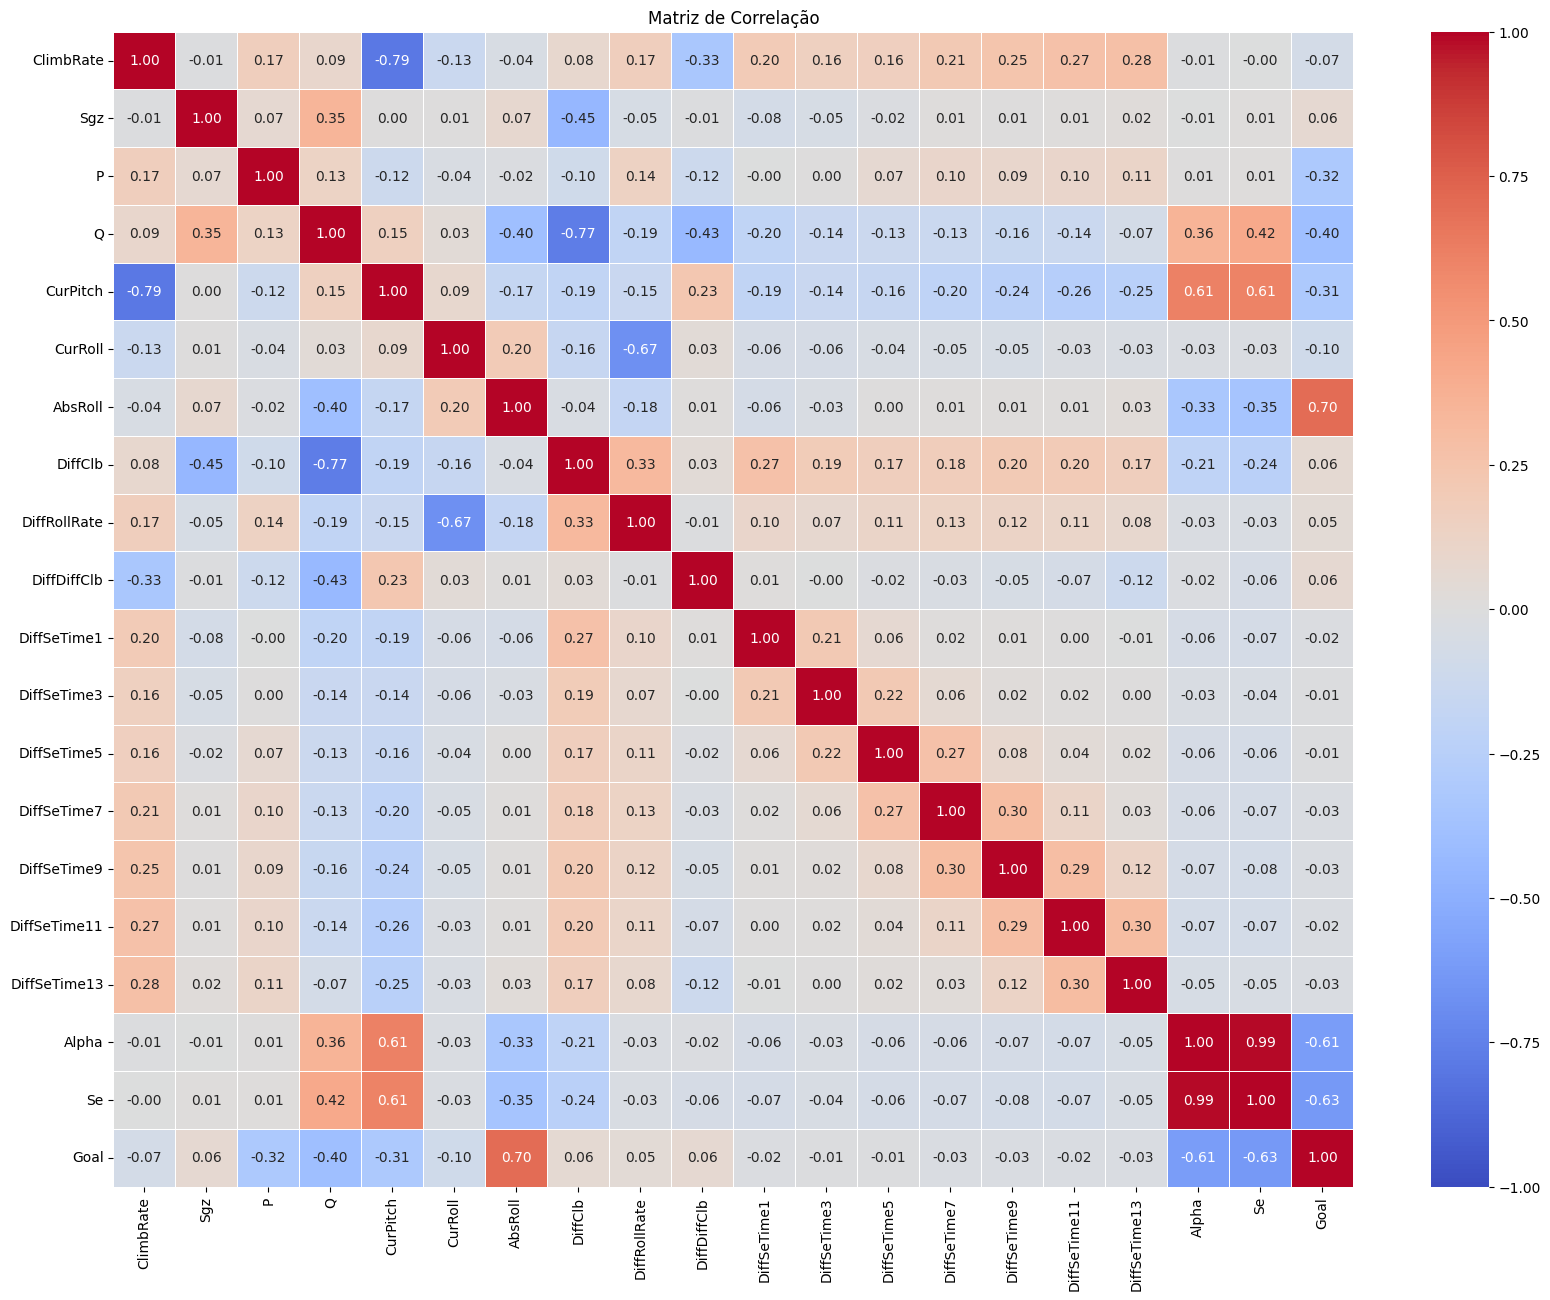

In [11]:
plot_corr_matrix(data)

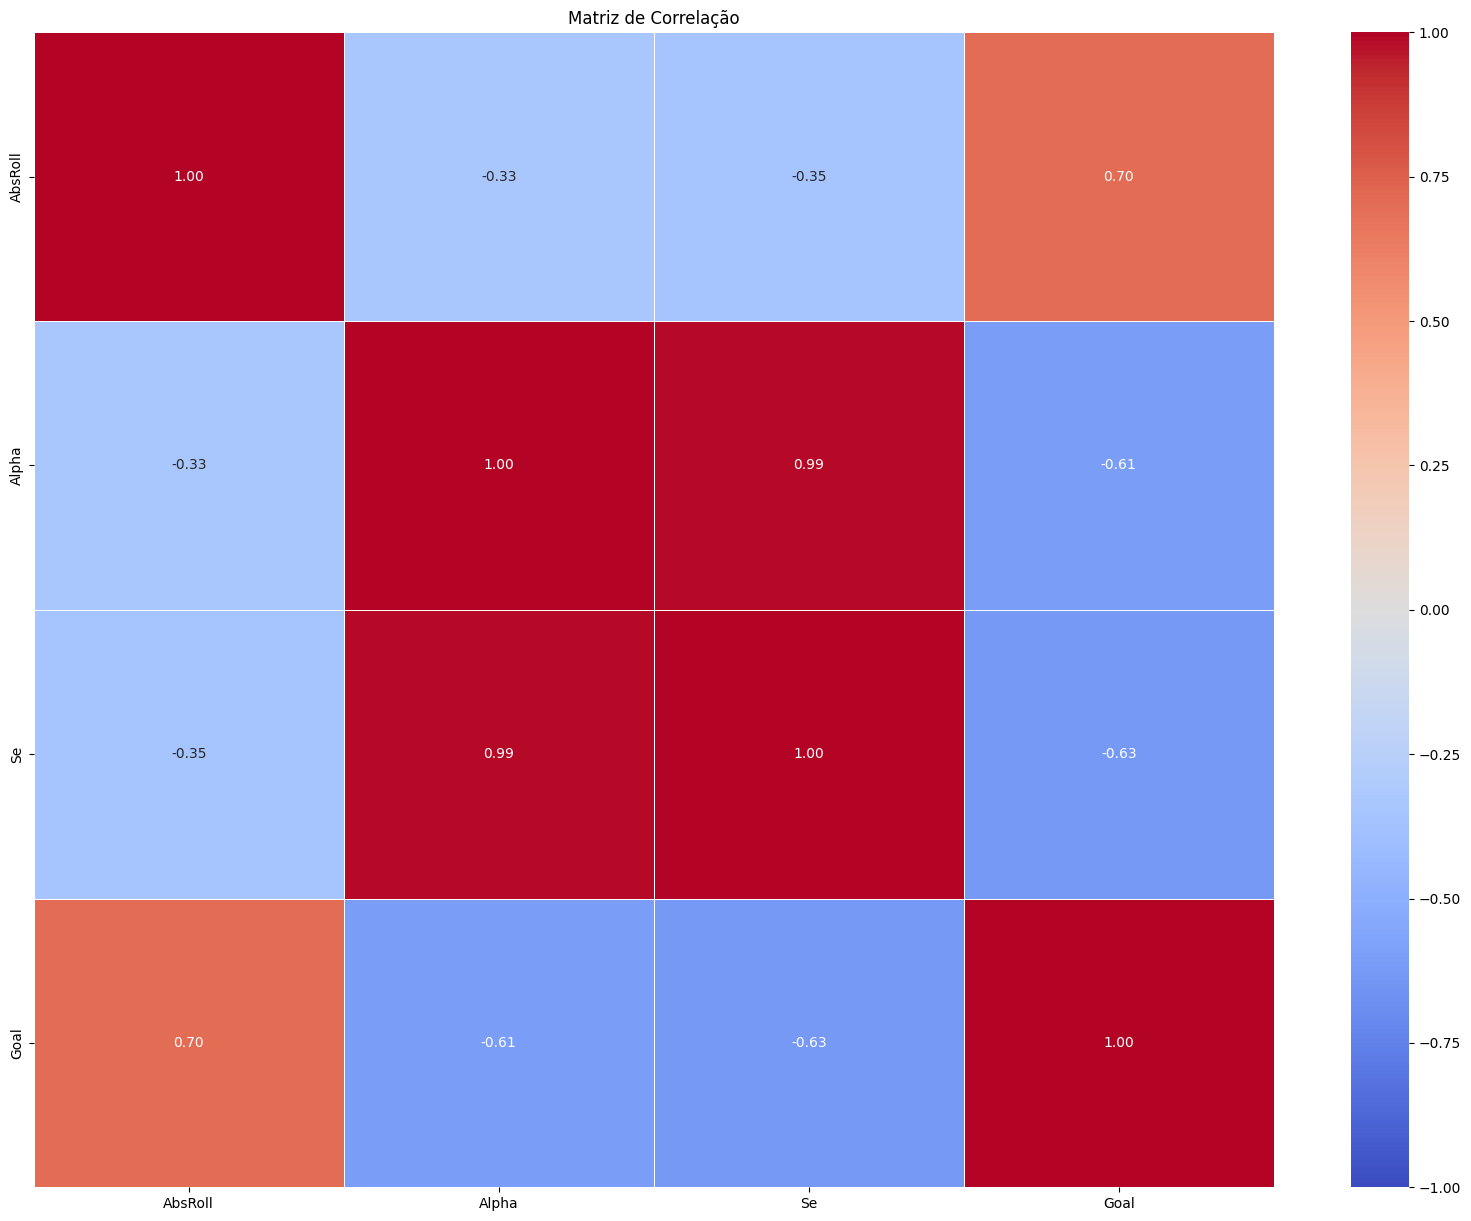

In [17]:
plot_corr_matrix(data[['AbsRoll', 'Alpha', 'Se', 'Goal']])

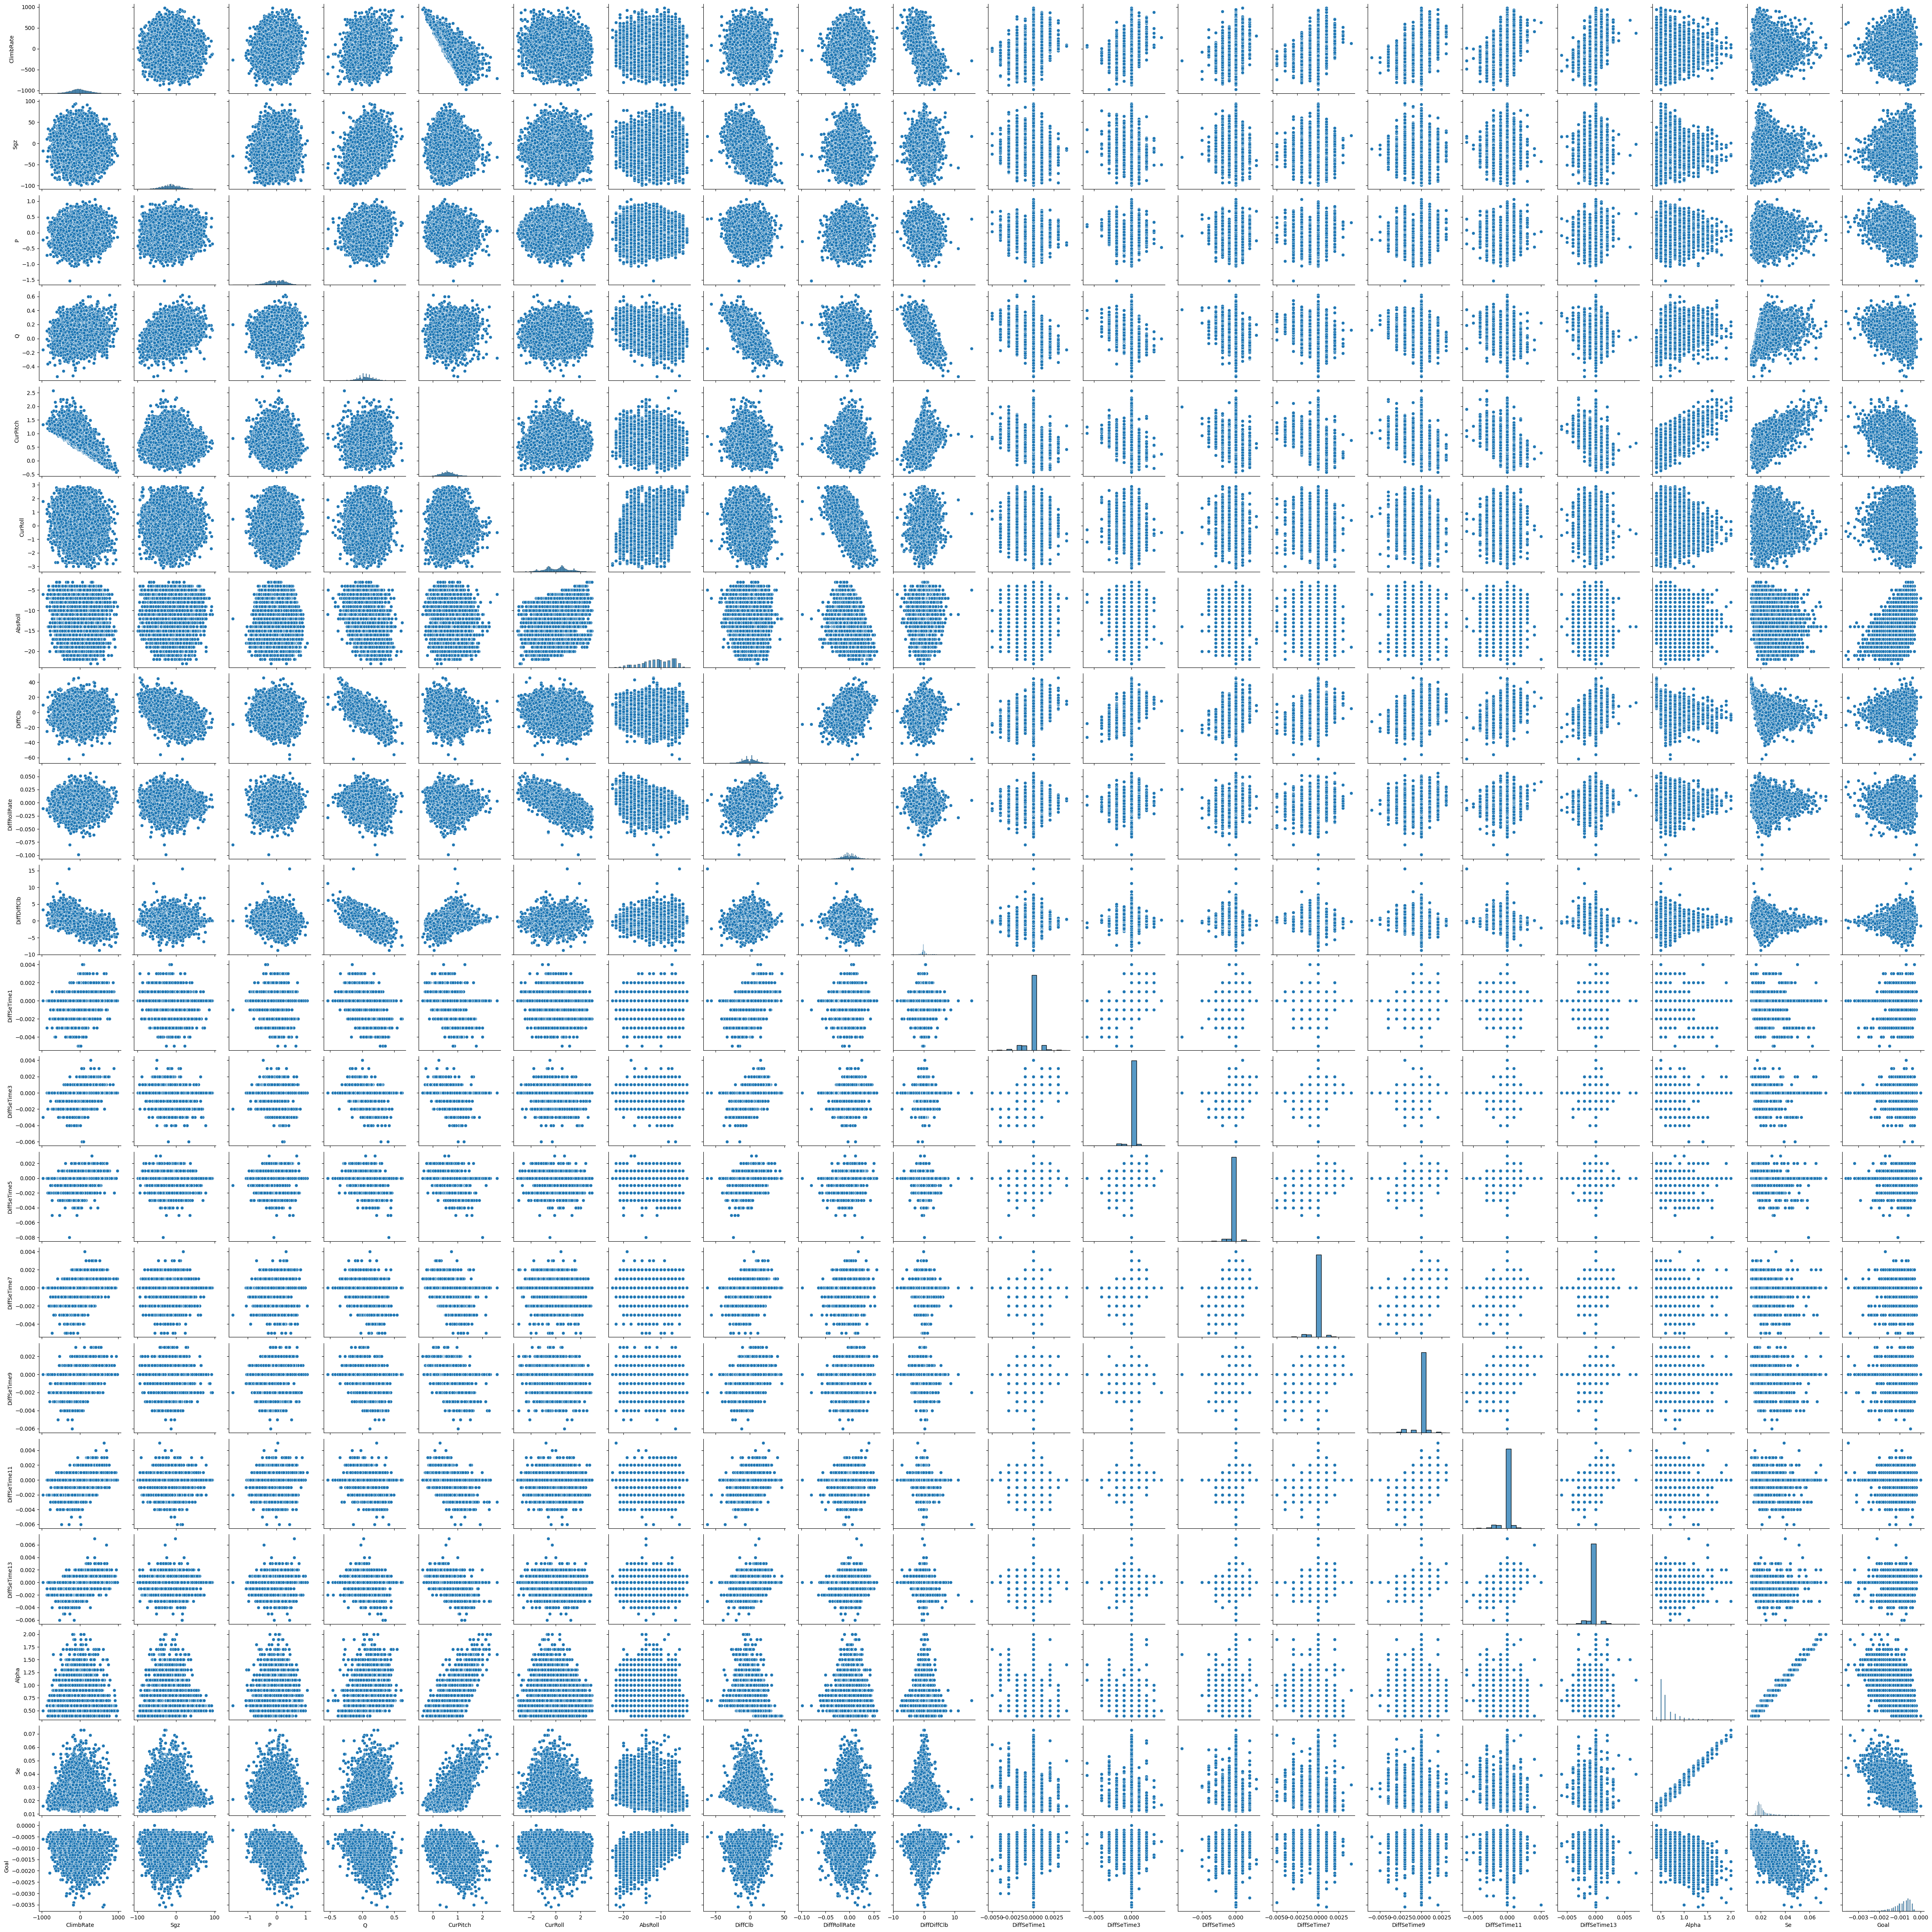

In [ ]:
sns.pairplot(data)
plt.show()

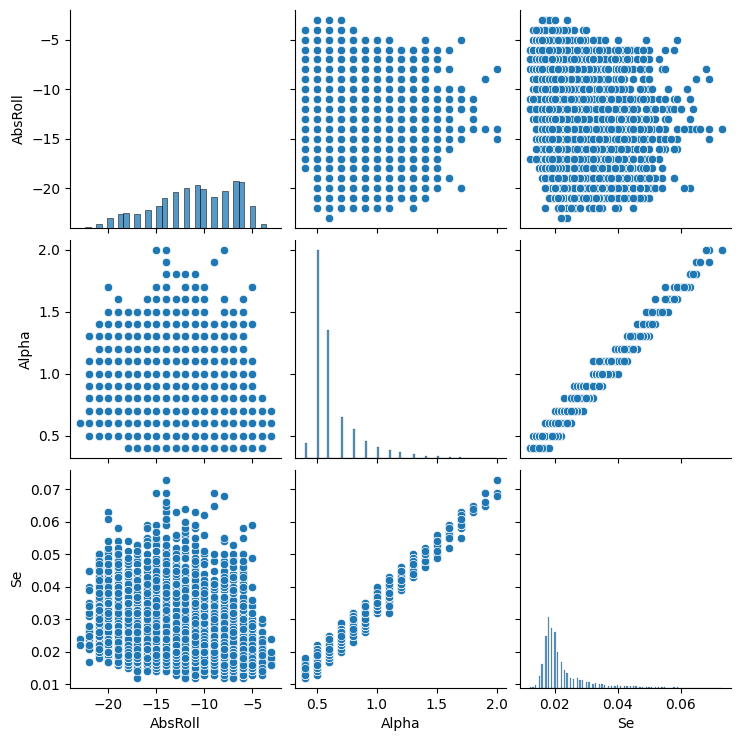

In [20]:
sns.pairplot(data[['AbsRoll', 'Alpha', 'Se']])
plt.show()

### IV e V

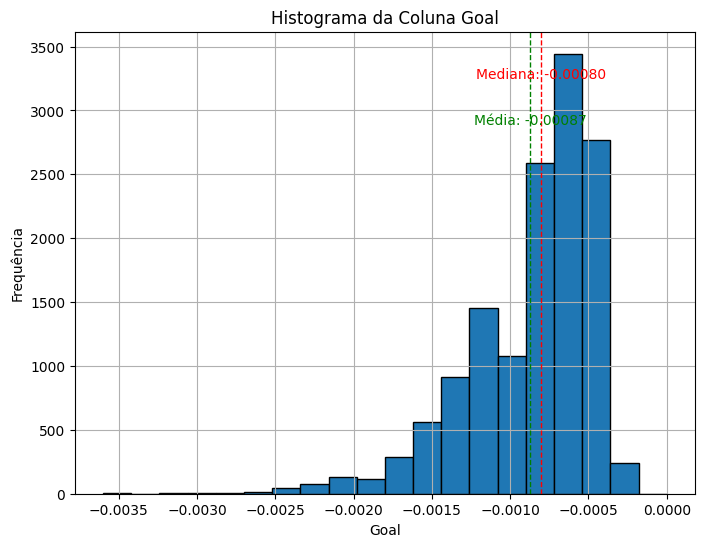

In [ ]:
median = np.median(data['Goal'])
mean = np.mean(data['Goal'])
# Plotando o histograma da coluna 'Goal'
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.hist(data['Goal'], bins=20, edgecolor='black')  # Cria o histograma com 20 bins e bordas pretas
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)  # Adiciona uma linha vertical para a mediana
plt.axvline(mean, color='green', linestyle='dashed', linewidth=1)  # Adiciona uma linha vertical para a média
plt.text(median, plt.ylim()[1] * 0.9, f'Mediana: {median:.5f}', color='red', ha='center')  # Adiciona o texto da mediana
plt.text(mean, plt.ylim()[1] * 0.8, f'Média: {mean:.5f}', color='green', ha='center')  # Adiciona o texto da média
# Configurações do gráfico
plt.xlabel('Goal')  # Rótulo do eixo x
plt.ylabel('Frequência')  # Rótulo do eixo y
plt.title('Histograma da Coluna Goal')  # Título do histograma
plt.grid(True)  # Adiciona grade ao gráfico (opcional)
plt.show()  # Mostra o gráfico

In [ ]:
optimal_goal = data['Goal'].median()

# Calculate the MAE using the median value as the prediction for all instances
mae = mean_absolute_error(data['Goal'], [optimal_goal] * len(data))

print(f"O valor de 'Goal' que minimiza a MAE é: {optimal_goal}")
print(f"MAE mínima encontrada: {mae}")

O valor de 'Goal' que minimiza a MAE é: -0.0008
MAE mínima encontrada: 0.0003034327272727273


In [ ]:
optimal_goal = data['Goal'].mean()

mse = mean_squared_error(data['Goal'], [optimal_goal] * len(data))

print(f"O valor de 'Goal' que minimiza a MSE é: {optimal_goal}")
print(f"MSE mínima encontrada: {mse}")

O valor de 'Goal' que minimiza a MSE é: -0.0008718690909090909
MSE mínima encontrada: 1.6629083377190083e-07


## Linear Regression

### IX

In [ ]:
data = pd.read_csv('./ailerons.csv')

In [ ]:
X = data[selected_features]
y = data['Goal']

X = sm.add_constant(X)  # Adiciona uma constante para o intercepto
model = sm.OLS(y, X).fit()
print(model.summary2(float_format='%.10f'))

                   Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.819       
Dependent Variable: Goal             AIC:                -199058.5348
Date:               2024-07-30 08:47 BIC:                -198907.9589
No. Observations:   13750            Log-Likelihood:     99549.      
Df Model:           19               F-statistic:        3266.       
Df Residuals:       13730            Prob (F-statistic): 0.00        
R-squared:          0.819            Scale:              3.0173e-08  
----------------------------------------------------------------------
                  Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
----------------------------------------------------------------------
const             0.0003    0.0000   43.3324  0.0000   0.0003   0.0004
ClimbRate         0.0000    0.0000    3.9967  0.0001   0.0000   0.0000
Sgz               0.0000    0.0000    3.1815  0.0015   0.0000   0.0000
P                -0.0004    0.000

In [ ]:
# Compute metricas de avaliação
def evaluate_model(model, X_test, y_test):
    y_test_pred = model.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    return mae_test, mse_test, r2_test

X = data[selected_features]
y = data['Goal']

X_train_all_columns, X_test_all_columns, y_train_all_columns, y_test_all_columns = train_test_split(X, y, test_size=0.2, random_state=42)
model_all_columns = LinearRegression()
model_all_columns.fit(X_train_all_columns, y_train_all_columns)
mae_test_all_columns, mse_test_all_columns, r2_test_all_columns = evaluate_model(model_all_columns, X_test_all_columns, y_test_all_columns)

columns_to_be_ignored = [ 'Q','DiffDiffClb']
X_train_selected_columns, X_test_selected_columns, y_train_selected_columns, y_test_selected_columns = train_test_split(X.drop(columns_to_be_ignored, axis = 1), y, test_size=0.2, random_state=42)
model_selected_columns = LinearRegression()
model_selected_columns.fit(X_train_selected_columns, y_train_selected_columns)
mae_test_selected_columns, mse_test_selected_columns, r2_test_selected_columns = evaluate_model(model_selected_columns, X_test_selected_columns, y_test_selected_columns)

print(f"MAE (todas as colunas / sem atributos descartados): {mae_test_all_columns:.8f} / {mae_test_selected_columns:.8f}")
print(f"MSE (todas as colunas / sem atributos descartados): {mse_test_all_columns:.8f} / {mse_test_selected_columns:.8f}")
print(f"R2 (todas as colunas / sem atributos descartados): {r2_test_all_columns:.8f} / {r2_test_selected_columns:.8f}")


MAE (todas as colunas / sem atributos descartados): 0.00012916 / 0.00012915
MSE (todas as colunas / sem atributos descartados): 0.00000003 / 0.00000003
R2 (todas as colunas / sem atributos descartados): 0.82742923 / 0.82749446


### X

In [ ]:
X = data[selected_features]
y = data['Goal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_no_regu = LinearRegression()
model_no_regu.fit(X_train, y_train)
y_pred_no_regu = model_no_regu.predict(X_test)
print("Resultados sem regularização:")
print(f'MAE: {mean_absolute_error(y_test, y_pred_no_regu):.8e}')
print(f'MSE: {mean_squared_error(y_test, y_pred_no_regu):.8e}')
print(f'RMSE {np.sqrt(mean_squared_error(y_test, y_pred_no_regu)):.8e}')
print(f'R^2: {r2_score(y_test, y_pred_no_regu):.8e}')
print("\n")
alphas = [0.2, 1, 5]
for alpha in alphas: 
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)

    print(f"Resultados do Ridge alpha = {alpha}:")
    print(f'MAE: {mean_absolute_error(y_test, y_pred_ridge):.8e}')
    print(f'MSE: {mean_squared_error(y_test, y_pred_ridge):8e}')
    print(f'RMSE {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.8e}')
    print(f'R^2: {r2_score(y_test, y_pred_ridge):.8e}')
    print("\n")

Resultados sem regularização:
MAE: 1.29156098e-04
MSE: 3.01593179e-08
RMSE 1.73664383e-04
R^2: 8.27429231e-01


Resultados do Ridge alpha = 0.2:
MAE: 1.29643390e-04
MSE: 3.047462e-08
RMSE 1.74569803e-04
R^2: 8.25625103e-01


Resultados do Ridge alpha = 1:
MAE: 1.30243256e-04
MSE: 3.070554e-08
RMSE 1.75229961e-04
R^2: 8.24303767e-01


Resultados do Ridge alpha = 5:
MAE: 1.30991430e-04
MSE: 3.103104e-08
RMSE 1.76156285e-04
R^2: 8.22441280e-01




## XGBoost

### XI

In [ ]:
df_results = pd.DataFrame(columns=['n_estimators', 'max_depth', 'learning_rate', 'MAE', 'MSE', 'RMSE', 'R^2'])

In [ ]:
X = data[selected_features]
y = data['Goal']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params = [[50, 4, 0.2],
          [50, 10, 1],
          [50, 10, 0.2],
          [50, 10, 0.04],
          [200, 4, 1],
          [200, 4, 0.2],
          [200, 4, 0.04],
          [200, 10, 0.2]]
for param in params:
    n_estimators, max_depth, learning_rate = param
    model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Resultados do XGBoost com n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate}:")
    print(f'MAE: {mae:.8e}')
    print(f'MSE: {mse:.8e}')
    print(f'RMSE {rmse:.8e}')
    print(f'R^2: {r2:.8e}')

    df_results.loc[len(df_results)] = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate,
                                    'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R^2': r2}

Resultados do XGBoost com n_estimators=50, max_depth=4, learning_rate=0.2:
MAE: 1.23871981e-04
MSE: 2.84243832e-08
RMSE 1.68595324e-04
R^2: 8.37356478e-01
Resultados do XGBoost com n_estimators=50, max_depth=10, learning_rate=1:
MAE: 1.39719164e-04
MSE: 3.62497351e-08
RMSE 1.90393632e-04
R^2: 7.92580035e-01
Resultados do XGBoost com n_estimators=50, max_depth=10, learning_rate=0.2:
MAE: 1.22332412e-04
MSE: 2.76497017e-08
RMSE 1.66281995e-04
R^2: 8.41789184e-01
Resultados do XGBoost com n_estimators=50, max_depth=10, learning_rate=0.04:
MAE: 1.33598004e-04
MSE: 3.30603268e-08
RMSE 1.81824990e-04
R^2: 8.10829739e-01
Resultados do XGBoost com n_estimators=200, max_depth=4, learning_rate=1:
MAE: 1.33185694e-04
MSE: 3.37757403e-08
RMSE 1.83781774e-04
R^2: 8.06736163e-01
Resultados do XGBoost com n_estimators=200, max_depth=4, learning_rate=0.2:
MAE: 1.23871989e-04
MSE: 2.84243842e-08
RMSE 1.68595327e-04
R^2: 8.37356472e-01
Resultados do XGBoost com n_estimators=200, max_depth=4, learning_ra

In [ ]:
df_results.sort_values(by='R^2', ascending=True, inplace=True)
df_results

n_estimators  max_depth  learning_rate       MAE           MSE      RMSE  \
1            50         10           1.00  0.000140  3.624974e-08  0.000190   
4           200          4           1.00  0.000133  3.377574e-08  0.000184   
3            50         10           0.04  0.000134  3.306033e-08  0.000182   
5           200          4           0.20  0.000124  2.842438e-08  0.000169   
0            50          4           0.20  0.000124  2.842438e-08  0.000169   
6           200          4           0.04  0.000123  2.786184e-08  0.000167   
7           200         10           0.20  0.000122  2.764970e-08  0.000166   
2            50         10           0.20  0.000122  2.764970e-08  0.000166   

        R^2  
1  0.792580  
4  0.806736  
3  0.810830  
5  0.837356  
0  0.837356  
6  0.840575  
7  0.841789  
2  0.841789

In [ ]:
df_results.sort_values(by='n_estimators', ascending=True, inplace=True)
df_results

n_estimators  max_depth  learning_rate       MAE           MSE      RMSE  \
1            50         10           1.00  0.000140  3.624974e-08  0.000190   
3            50         10           0.04  0.000134  3.306033e-08  0.000182   
2            50         10           0.20  0.000122  2.764970e-08  0.000166   
0            50          4           0.20  0.000124  2.842438e-08  0.000169   
5           200          4           0.20  0.000124  2.842438e-08  0.000169   
4           200          4           1.00  0.000133  3.377574e-08  0.000184   
6           200          4           0.04  0.000123  2.786184e-08  0.000167   
7           200         10           0.20  0.000122  2.764970e-08  0.000166   

        R^2  
1  0.792580  
3  0.810830  
2  0.841789  
0  0.837356  
5  0.837356  
4  0.806736  
6  0.840575  
7  0.841789

In [ ]:
df_results.sort_values(by='max_depth', ascending=True, inplace=True)
df_results

n_estimators  max_depth  learning_rate       MAE           MSE      RMSE  \
0            50          4           0.20  0.000124  2.842438e-08  0.000169   
6           200          4           0.04  0.000123  2.786184e-08  0.000167   
4           200          4           1.00  0.000133  3.377574e-08  0.000184   
5           200          4           0.20  0.000124  2.842438e-08  0.000169   
2            50         10           0.20  0.000122  2.764970e-08  0.000166   
3            50         10           0.04  0.000134  3.306033e-08  0.000182   
1            50         10           1.00  0.000140  3.624974e-08  0.000190   
7           200         10           0.20  0.000122  2.764970e-08  0.000166   

        R^2  
0  0.837356  
6  0.840575  
4  0.806736  
5  0.837356  
2  0.841789  
3  0.810830  
1  0.792580  
7  0.841789

In [ ]:
df_results.sort_values(by='learning_rate', ascending=True, inplace=True)
df_results

n_estimators  max_depth  learning_rate       MAE           MSE      RMSE  \
6           200          4           0.04  0.000123  2.786184e-08  0.000167   
3            50         10           0.04  0.000134  3.306033e-08  0.000182   
5           200          4           0.20  0.000124  2.842438e-08  0.000169   
0            50          4           0.20  0.000124  2.842438e-08  0.000169   
7           200         10           0.20  0.000122  2.764970e-08  0.000166   
2            50         10           0.20  0.000122  2.764970e-08  0.000166   
4           200          4           1.00  0.000133  3.377574e-08  0.000184   
1            50         10           1.00  0.000140  3.624974e-08  0.000190   

        R^2  
6  0.840575  
3  0.810830  
5  0.837356  
0  0.837356  
7  0.841789  
2  0.841789  
4  0.806736  
1  0.792580

In [ ]:
df_results.groupby(['n_estimators']).mean().sort_values(by='R^2', ascending=False)

max_depth  learning_rate       MAE           MSE      RMSE  \
n_estimators                                                               
200                 5.5           0.36  0.000126  2.942792e-08  0.000171   
50                  8.5           0.36  0.000130  3.134604e-08  0.000177   

                   R^2  
n_estimators            
200           0.831614  
50            0.820639

In [ ]:
df_results.groupby([ 'max_depth']).mean().sort_values(by='R^2', ascending=False)

n_estimators  learning_rate       MAE           MSE      RMSE  \
max_depth                                                                  
4                 162.5           0.36  0.000126  2.962159e-08  0.000172   
10                 87.5           0.36  0.000129  3.115237e-08  0.000176   

                R^2  
max_depth            
4          0.830506  
10         0.821747

In [ ]:
df_results.groupby([ 'learning_rate']).mean().sort_values(by='R^2', ascending=False)

n_estimators  max_depth       MAE           MSE      RMSE  \
learning_rate                                                              
0.20                  125.0        7.0  0.000123  2.803704e-08  0.000167   
0.04                  125.0        7.0  0.000128  3.046108e-08  0.000174   
1.00                  125.0        7.0  0.000136  3.501274e-08  0.000187   

                    R^2  
learning_rate            
0.20           0.839573  
0.04           0.825703  
1.00           0.799658

### XII